# Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [36]:
data_filename = 'tactics/data/stats/metrics_test_t1600_sf14_new.csv'
df = pd.read_csv(data_filename)

# Do analysis

In [ ]:
df.describe()

In [ ]:
df

Text(0, 0.5, 'Frequency')

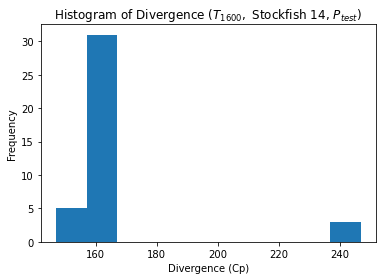

In [38]:
df['avg_divergence'] = df['divergence'] / df['total_matches']
plt.hist(df['avg_divergence'], bins=10)
#plt.axvline(df.loc[(df['tactic_text'] == "f(A,B,C):-legal_move(B,C,A)")]['avg_divergence'].values, linestyle='dashed')
plt.title('Histogram of Divergence $(T_{1600},$ Stockfish 14, $P_{test})$')
plt.xlabel('Divergence (Cp)')
plt.ylabel('Frequency')

In [ ]:
df.loc[(df['text'] == "f(A,B,C):-legal_move(B,C,A)")]['avg_divergence'].values

In [ ]:
plt.hist(df['avg'], bins=10)
plt.axvline(df.loc[(df['text'] == "f(A,B,C):-legal_move(B,C,A)")]['avg_divergence'].values, linestyle='dashed')

Text(0, 0.5, 'Frequency')

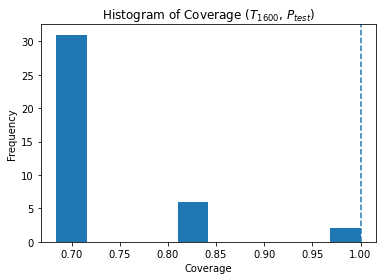

In [25]:
df['coverage'] = df['total_matches'] / df['total_positions']
plt.hist(df['coverage'], bins=10)
plt.axvline(df.loc[(df['tactic_text'] == "f(A,B,C):-legal_move(B,C,A)")]['coverage'].values, linestyle='dashed')
plt.title('Histogram of Coverage $(T_{1600}$, $P_{test})$')
plt.xlabel('Coverage')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

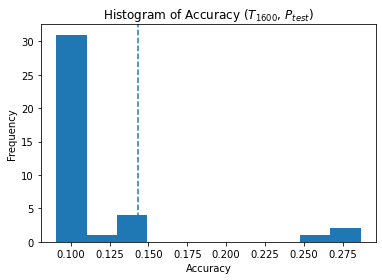

In [31]:
df['accuracy'] = df['correct_move'] / df['total_matches']
plt.hist(df['accuracy'], bins=10)
plt.axvline(df.loc[(df['tactic_text'] == "f(A,B,C):-legal_move(B,C,A)")]['accuracy'].values, linestyle='dashed')
plt.title('Histogram of Accuracy $(T_{1600}$, $P_{test})$')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

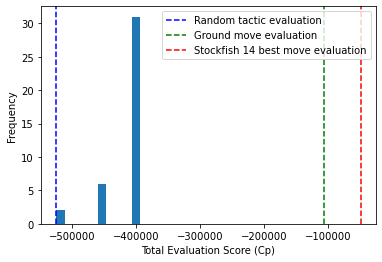

In [27]:
plt.hist(df['tactic_evals'], bins=10)
plt.axvline(df.loc[(df['tactic_text'] == "f(A,B,C):-legal_move(B,C,A)")]['tactic_evals'].values, linestyle='dashed', color='blue', label='Random tactic evaluation')
plt.axvline(df.loc[(df['tactic_text'] == "f(A,B,C):-legal_move(B,C,A)")]['ground_evals'].values, linestyle='dashed', color='green', label='Ground move evaluation')
plt.axvline(df.loc[(df['tactic_text'] == "f(A,B,C):-legal_move(B,C,A)")]['best_move_evals'].values, linestyle='dashed', color='red', label='Stockfish 14 best move evaluation')
plt.xlabel('Total Evaluation Score (Cp)')
plt.ylabel('Frequency')
plt.legend(loc=1)

In [39]:
final = df.sort_values(by = ['avg_divergence'], ascending = [True])

In [40]:
final

,total_positions,total_matches,divergence,avg,empty_suggestions,num_suggestions,correct_move,tactic_evals,ground_evals,best_move_evals,tactic_text,avg_divergence
0,1000,1000,147110.000000,147110.000000,0,2976,143,-524275,-106331,-49028,"f(A,B,C):-legal_move(B,C,A)",147.110000
38,1000,1000,147110.000000,147110.000000,0,2976,143,-524275,-106331,-49028,"f(A,B,C):-legal_move(B,C,A),different_pos(B,C)",147.110000
21,1000,824,129138.666667,129138.666667,176,2408,110,-453830,-106331,-49028,"f(A,B,C):-legal_move(B,C,A),attacks(B,D,A),dif...",156.721683
12,1000,824,129138.666667,129138.666667,176,2408,104,-453830,-106331,-49028,"f(A,B,C):-legal_move(B,C,A),attacks(B,D,A),att...",156.721683
22,1000,824,129138.666667,129138.666667,176,2408,110,-453830,-106331,-49028,"f(A,B,C):-legal_move(B,C,A),attacks(B,D,A),dif...",156.721683
23,1000,684,113180.833333,113180.833333,316,2024,62,-393479,-106331,-49028,"f(A,B,C):-legal_move(B,C,A),attacks(B,E,A),beh...",165.469055
24,1000,684,113180.833333,113180.833333,316,2024,62,-393479,-106331,-49028,"f(A,B,C):-legal_move(B,C,A),attacks(B,E,A),beh...",165.469055
25,1000,684,113180.833333,113180.833333,316,2024,62,-393479,-106331,-49028,"f(A,B,C):-legal_move(B,C,A),attacks(B,E,A),beh...",165.469055
26,1000,684,113180.833333,113180.833333,316,2024,62,-393479,-106331,-49028,"f(A,B,C):-legal_move(B,C,A),attacks(B,E,A),beh...",165.469055
27,1000,684,113180.833333,113180.833333,316,2024,62,-393479,-106331,-49028,"f(A,B,C):-legal_move(B,C,A),attacks(B,E,A),beh...",165.469055


# Calculate Dataset Metrics

In [ ]:
from collections import Counter

total_games = 0
valid_elo = 0
total_pos = 0
total_elo = 0
game_count = Counter()

pgn_path = 'tactics/data/lichess_db_standard_rated_2013-01.pgn'

In [ ]:
offsets = []
handle = open(pgn_path)
header = chess.pgn.read_headers(handle)

In [ ]:
header.get('Termination')


In [ ]:
import chess.pgn

with open(pgn_path) as pgn:
    while game := chess.pgn.read_game(pgn):
        total_games += 1
        white_elo = game.headers['WhiteElo']
        black_elo = game.headers['BlackElo']
        if '?' not in white_elo and '?' not in black_elo:
            total_elo += int(white_elo)
            total_elo += int(black_elo)
            valid_elo += 1
        game_count[game.headers['Event']] += 1

In [ ]:
print('Total games', total_games)
avg_elo = total_elo / (2 * valid_elo)
print('Average ELO', avg_elo)

In [ ]:
variance = 0

with open(pgn_path) as pgn:
    while game := chess.pgn.read_game(pgn):
        total_games += 1
        white_elo = game.headers['WhiteElo']
        black_elo = game.headers['BlackElo']
        if '?' not in white_elo and '?' not in black_elo:
            variance += (int(white_elo) - avg_elo) ** 2
            variance += (int(black_elo) - avg_elo) ** 2
        game_count[game.headers['Event']] += 1

In [ ]:
import math

print('SD', math.sqrt(variance / valid_elo))

# Test Evaluation

In [ ]:
import chess
import chess.engine
from tactics.util import *

board = chess.Board('r1bqk1nr/ppp2ppp/3b4/3p4/8/2PNP3/PP3PPP/RNBQKB1R b KQkq - 2 7')
move1 = chess.Move.from_uci('g8h6')
move2 = chess.Move.from_uci('g8f6')
engine_path = get_lc0_cmd(LC0, MAIA_1900) + ['--verbose-move-stats']
#engine_path = STOCKFISH
mate_score = 2000
n = 5

In [ ]:
with chess.engine.SimpleEngine.popen_uci(engine_path) as engine:
    analysis = engine.analyse(board, limit=chess.engine.Limit(depth=1), multipv=n, game=object())
    top_results = [(root['pv'][0], root['score'].relative.score(mate_score=mate_score)) for root in analysis]
    top_n_results = top_results[:n]

In [ ]:
top_n_results

In [ ]:
with chess.engine.SimpleEngine.popen_uci(engine_path) as engine:
    evals = get_evals(engine, board, [move1, move2])
evals